In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("cars_clus.csv")

In [5]:
for column in df.columns:
    count = df[column].value_counts().get('$null$')
    print("Column:", column)
    print("Count of null", ":", count)
    print()

Column: manufact
Count of null : None

Column: model
Count of null : None

Column: sales
Count of null : 2

Column: resale
Count of null : 38

Column: type
Count of null : 2

Column: price
Count of null : 2

Column: engine_s
Count of null : 1

Column: horsepow
Count of null : 1

Column: wheelbas
Count of null : 1

Column: width
Count of null : 1

Column: length
Count of null : 1

Column: curb_wgt
Count of null : 2

Column: fuel_cap
Count of null : 1

Column: mpg
Count of null : 3

Column: lnsales
Count of null : 2

Column: partition
Count of null : None



**Null values in dataset were represented as "$null$" so we replaced it with NaN values**

In [6]:
df = df.replace("$null$",np.nan)
df.shape

(159, 16)

**Rows having more than 2 null values were removed**

In [7]:
null_counts = df.isnull().sum(axis=1)
df= df.drop(null_counts[null_counts > 2].index)
print(df)

    manufact    model   sales  resale   type   price engine_s horsepow  \
0      Acura  Integra  16.919  16.360  0.000  21.500    1.800  140.000   
1      Acura       TL  39.384  19.875  0.000  28.400    3.200  225.000   
2      Acura       CL  14.114  18.225  0.000     NaN    3.200  225.000   
3      Acura       RL   8.588  29.725  0.000  42.000    3.500  210.000   
4       Audi       A4  20.397  22.255  0.000  23.990    1.800  150.000   
..       ...      ...     ...     ...    ...     ...      ...      ...   
152    Volvo      V40   3.545     NaN  0.000  24.400    1.900  160.000   
153    Volvo      S70  15.245     NaN  0.000  27.500    2.400  168.000   
154    Volvo      V70  17.531     NaN  0.000  28.800    2.400  168.000   
155    Volvo      C70   3.493     NaN  0.000  45.500    2.300  236.000   
156    Volvo      S80  18.969     NaN  0.000  36.000    2.900  201.000   

    wheelbas   width   length curb_wgt fuel_cap     mpg lnsales  partition  
0    101.200  67.300  172.400    2

In [8]:
df['manufact'].fillna(df['manufact'].mode()[0],inplace = True)
df.dtypes

manufact      object
model         object
sales         object
resale        object
type          object
price         object
engine_s      object
horsepow      object
wheelbas      object
width         object
length        object
curb_wgt      object
fuel_cap      object
mpg           object
lnsales       object
partition    float64
dtype: object

**Change type of numerical columns from object to float**

In [9]:
df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
print(df.dtypes)

manufact      object
model         object
sales        float64
resale       float64
type         float64
price        float64
engine_s     float64
horsepow     float64
wheelbas     float64
width        float64
length       float64
curb_wgt     float64
fuel_cap     float64
mpg          float64
lnsales      float64
partition    float64
dtype: object


In [10]:
df.describe()

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
count,156.000000,120.000000,156.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,156.000000,156.0
mean,52.994987,18.060750,0.256410,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.843506,3.291468,0.0
std,68.248508,11.500614,0.438057,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282720,1.321317,0.0
min,0.110000,5.160000,0.000000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,-2.207000,0.0
25%,14.035000,11.255000,0.000000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,2.641500,0.0
50%,29.213000,14.095000,0.000000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,3.374500,0.0
75%,68.069750,19.878750,1.000000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,4.220750,0.0
max,540.561000,67.550000,1.000000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,6.293000,0.0


**Because the column resale had a lot of nulls so we used linear regression to fill null values in it , iterative imputer from sklearn automatically fills null vlaues using linear regression**

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10)
imputed_column = imputer.fit_transform(df[['resale']])
df['resale'] = imputed_column
print(df)

    manufact    model   sales    resale  type  price  engine_s  horsepow  \
0      Acura  Integra  16.919  16.36000   0.0  21.50       1.8     140.0   
1      Acura       TL  39.384  19.87500   0.0  28.40       3.2     225.0   
2      Acura       CL  14.114  18.22500   0.0    NaN       3.2     225.0   
3      Acura       RL   8.588  29.72500   0.0  42.00       3.5     210.0   
4       Audi       A4  20.397  22.25500   0.0  23.99       1.8     150.0   
..       ...      ...     ...       ...   ...    ...       ...       ...   
152    Volvo      V40   3.545  18.06075   0.0  24.40       1.9     160.0   
153    Volvo      S70  15.245  18.06075   0.0  27.50       2.4     168.0   
154    Volvo      V70  17.531  18.06075   0.0  28.80       2.4     168.0   
155    Volvo      C70   3.493  18.06075   0.0  45.50       2.3     236.0   
156    Volvo      S80  18.969  18.06075   0.0  36.00       2.9     201.0   

     wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0       10

In [12]:
mode_value = df['type'].mode()[0]
df['type'].fillna(mode_value, inplace=True)


In [13]:
df.isnull().sum()


manufact     0
model        0
sales        0
resale       0
type         0
price        1
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     1
fuel_cap     0
mpg          2
lnsales      0
partition    0
dtype: int64

**Any left columns with null values were filled with median of column**

In [14]:
for column in df.columns:
    if df[column].isnull().sum()>0:
        df[column].fillna(df[column].median(), inplace=True)

In [15]:
df.isnull().sum()


manufact     0
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [16]:
df.describe()

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0
mean,52.994987,18.060750,0.256410,27.361321,3.060897,185.948718,107.487179,71.150000,187.343590,3.377795,17.951923,23.845513,3.291468,0.0
std,68.248508,10.076940,0.438057,14.310006,1.044653,56.700321,7.641303,3.451872,13.431754,0.628471,3.887921,4.255036,1.321317,0.0
min,0.110000,5.160000,0.000000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,-2.207000,0.0
25%,14.035000,12.527500,0.000000,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,2.641500,0.0
50%,29.213000,17.617500,0.000000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,3.374500,0.0
75%,68.069750,18.080562,1.000000,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,4.220750,0.0
max,540.561000,67.550000,1.000000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,6.293000,0.0


**Features such as ‘manufact’, ‘model’, ‘sales’, ‘resale’, and ‘partition’ were dropped as they were considered irrelevant to compare for newly developed vehicle prototypes**

In [17]:
from sklearn.preprocessing import StandardScaler
feature_set = df[['type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg']]
scaler = StandardScaler()
scaler.fit_transform(feature_set)
print(feature_set)

     type   price  engine_s  horsepow  wheelbas  width  length  curb_wgt  \
0     0.0  21.500       1.8     140.0     101.2   67.3   172.4     2.639   
1     0.0  28.400       3.2     225.0     108.1   70.3   192.9     3.517   
2     0.0  22.799       3.2     225.0     106.9   70.6   192.0     3.470   
3     0.0  42.000       3.5     210.0     114.6   71.4   196.6     3.850   
4     0.0  23.990       1.8     150.0     102.6   68.2   178.0     2.998   
..    ...     ...       ...       ...       ...    ...     ...       ...   
152   0.0  24.400       1.9     160.0     100.5   67.6   176.6     3.042   
153   0.0  27.500       2.4     168.0     104.9   69.3   185.9     3.208   
154   0.0  28.800       2.4     168.0     104.9   69.3   186.2     3.259   
155   0.0  45.500       2.3     236.0     104.9   71.5   185.7     3.601   
156   0.0  36.000       2.9     201.0     109.9   72.1   189.8     3.600   

     fuel_cap   mpg  
0        13.2  28.0  
1        17.2  25.0  
2        17.2  26.0  

**Dendogram**

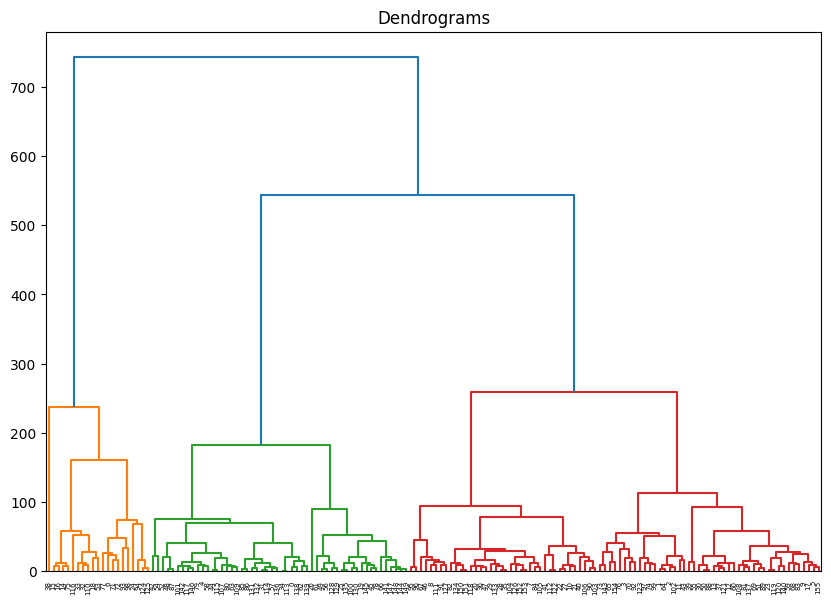

In [18]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = sch.dendrogram(sch.linkage(feature_set, method='ward'))

**Three colors in dendogram indicates three clusters**

In [31]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
df['clusters'] = cluster.fit_predict(feature_set)


C:\Users\Ammar Younas\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


**Reduced  to show on a 2-d axis ,reduce to two components**

[[-4.79666968e+01 -1.25728644e+01]
 [ 3.85613083e+01  2.08315275e+00]
 [ 3.72308613e+01  2.17529175e+00]
 [ 2.76370890e+01  5.99403037e+00]
 [-3.69755948e+01 -7.90379860e+00]
 [ 1.57511997e+01  2.82509535e+00]
 [ 1.29265468e+02 -3.09688881e+00]
 [-1.68778383e+01 -9.23552163e+00]
 [ 6.87773191e+00 -1.19999738e+01]
 [ 9.41976138e+00 -1.07632770e+00]
 [-1.10181226e+01  8.77366483e+00]
 [ 5.30100241e+01  5.68397258e+00]
 [ 2.16676235e+01  1.73041062e+01]
 [ 1.99979741e+01  1.15975603e+01]
 [ 9.14460799e+01  1.24096915e+01]
 [ 9.17022285e+01  4.76155622e+00]
 [ 9.05362620e+01  3.90135521e+00]
 [ 1.51517019e+01  4.46671576e+00]
 [ 7.36901747e+01  1.02885446e+01]
 [-7.29171324e+01 -3.74834171e-01]
 [-1.76694108e+01  5.29201011e+00]
 [-1.11628520e+01  1.39852554e+01]
 [-6.43490369e+00  1.23425511e+01]
 [ 1.33238813e+01  2.14955854e+00]
 [ 1.57576977e+02 -2.08594052e+01]
 [-6.91732731e+01 -1.02506422e+01]
 [-1.36530296e+02 -2.96848288e+01]
 [-6.33103876e+00  1.42575401e+01]
 [-2.37852055e+01  4

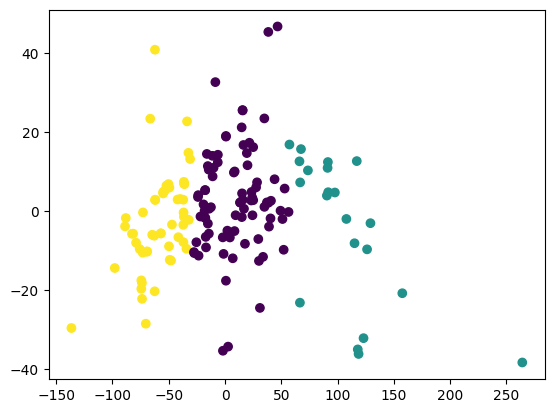

In [32]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(feature_set)
print(X_reduced)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=df.clusters)


**We cannot calculate accuracy and precision in Unsupervised Learning , but these are some metrics used to check the quality of clustering**

In [33]:
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_avg = silhouette_score(feature_set, df.clusters)

print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.4516959231836921


In [34]:
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(feature_set, df.clusters)
print("Calinski-Harabasz Index:", ch_score)


Calinski-Harabasz Index: 216.1575933041665
